In [74]:
from typing import List
from extr import RegEx, RegExLabel, RegExRelationLabelBuilder
from extr.entities import create_entity_extractor, EntityAnnotator
from extr.relations import RelationExtractor

In [75]:
kb = {
    'PERIOD': [
        '1st',
        '2nd',
        '3rd',
        '4th',
        'OT',
    ],
    'TEAM': [
        'ARZ',
        'Arizona',
        'ATL',
        'Atlanta',
        'BLT',
        'Baltimore',
        'BUF',
        'Buffalo',
        'CAR',
        'Carolina',
        'CHI',
        'Chicago',
        'CIN',
        'Cinncinatti',
        'CLV',
        'Cleveland',
        'DAL',
        'Dallas',
        'DEN',
        'Denver',
        'DET',
        'Detroit',
        'GB',
        'Green Bay',
        'HST',
        'Houston',
        'IND',
        'Indianapolis',
        'JAX',
        'Jacksonville',
        'KC',
        'Kansas City',
        'LA',
        'Los Angeles Rams',
        'LAC',
        'Los Angeles Chargers',
        'LV',
        'Las Vegas',
        'MIA',
        'Miami',
        'MIN',
        'Minnesota',
        'NE',
        'New England',
        'NO',
        'New Orleans',
        'NYG',
        'New York Giants',
        'NYJ',
        'New York Jets',
        'PHI',
        'Philadelphia',
        'PIT',
        'Pittsburgh',
        'SEA',
        'Seattle',
        'SF',
        'San Francisco',
        'TB',
        'Tampa Bay',
        'TEN',
        'Tennessee',
        'WAS',
        'Washington',
    ]
}

entity_patterns: List[RegExLabel] = [
    RegExLabel(
        label='TIME',
        regexes=[
            RegEx(expressions=[
                r'\b[0-9]{1,2}:[0-9]{2}\b',
            ]),
        ],
    ),
    RegExLabel(
        label='QUANTITY',
        regexes=[
            RegEx(expressions=[
                r'(?<=[\s\(])-?\d{1,3}(?=\b)',
            ])
        ]
    ),
]

entity_extractor = create_entity_extractor(entity_patterns, kb)
relation_extractor = RelationExtractor(relation_labels=[
    RegExRelationLabelBuilder('is_at') \
        .add_e2_to_e1(
            e2='TIME',
            relation_expressions=[
                r'(\s+-\s+)',
            ],
            e1='PERIOD'
        ) \
        .build(),
    RegExRelationLabelBuilder('is_at') \
        .add_e2_to_e1(
            e2='TIME',
            relation_expressions=[
                r'(\s+-\s+)',
            ],
            e1='PERIOD'
        ) \
        .build(),
    RegExRelationLabelBuilder('is_spot_of_ball') \
        .add_e1_to_e2(
            e1='TEAM',
            relation_expressions=[
                r'\s+',
            ],
            e2='QUANTITY',
        ) \
        .build()
])

In [76]:
instances = []
with open('./data/2/2022_w1_g401437630.txt', 'r') as source_file:
    instances = source_file.read().split('\n')

In [77]:
output = []
for instance in instances:
    entities = entity_extractor.get_entities(instance)
    relations = relation_extractor.extract(
        EntityAnnotator().annotate(instance, entities),
        entities
    )

    if len(relations) > 0:
        kb = {
            'entities': entities
        }

        for relation in relations:
            if not relation.definition in kb:
                kb[relation.definition] = []

            kb[relation.definition].append(relation)

        output.append(kb)

output


[{'entities': [<Entity label="QUANTITY" text="35" span=(48, 50)>,
   <Entity label="TEAM" text="MIA" span=(44, 47)>,
   <Entity label="QUANTITY" text="65" span=(30, 32)>,
   <Entity label="PERIOD" text="1st" span=(9, 12)>,
   <Entity label="TIME" text="15:00" span=(1, 6)>],
  'r("PERIOD", "TIME")': [<Relation e1="1st" r="is_at" e2="15:00">,
   <Relation e1="1st" r="is_at" e2="15:00">],
  'r("TEAM", "QUANTITY")': [<Relation e1="MIA" r="is_spot_of_ball" e2="35">]},
 {'entities': [<Entity label="QUANTITY" text="9" span=(74, 75)>,
   <Entity label="QUANTITY" text="34" span=(67, 69)>,
   <Entity label="TEAM" text="NE" span=(64, 66)>,
   <Entity label="PERIOD" text="1st" span=(9, 12)>,
   <Entity label="TIME" text="15:00" span=(1, 6)>],
  'r("PERIOD", "TIME")': [<Relation e1="1st" r="is_at" e2="15:00">,
   <Relation e1="1st" r="is_at" e2="15:00">],
  'r("TEAM", "QUANTITY")': [<Relation e1="NE" r="is_spot_of_ball" e2="34">]},
 {'entities': [<Entity label="QUANTITY" text="12" span=(47, 49)>,
 

In [78]:
group_by_period = {}
for kb in output:
    if not 'r("PERIOD", "TIME")' in kb:
        continue

    at = kb['r("PERIOD", "TIME")'][0]
    period, time = at.e1.text, at.e2.text
    key = f'{period}-{time}'

    if not key in group_by_period:
        group_by_period[f'{period}-{time}'] = []

    group_by_period[f'{period}-{time}'].append(kb)

group_by_period.keys()

dict_keys(['1st-15:00', '1st-13:01', '1st-12:20', '1st-11:33', '1st-10:48', '1st-10:05', '1st-9:52', '1st-9:47', '1st-9:05', '1st-8:23', '1st-7:38', '1st-6:54', '1st-6:48', '1st-6:20', '1st-5:40', '1st-4:59', '1st-4:05', '1st-3:29', '1st-3:07', '1st-2:31', '1st-1:48', '1st-1:27', '1st-0:50', '1st-0:06', '1st-0:00', '2nd-15:00', '2nd-14:15', '2nd-14:07', '2nd-13:32', '2nd-12:49', '2nd-12:08', '2nd-11:39', '2nd-11:29', '2nd-10:45', '2nd-10:00', '2nd-9:13', '2nd-8:29', '2nd-7:53', '2nd-7:45', '2nd-7:34', '2nd-7:29', '2nd-7:24', '2nd-6:45', '2nd-6:24', '2nd-5:50', '2nd-5:04', '2nd-4:05', '2nd-3:42', '2nd-3:02', '2nd-2:32', '2nd-2:27', '2nd-2:04', '2nd-2:00', '2nd-1:20', '2nd-1:17', '2nd-0:31', '2nd-0:18', '2nd-0:00', '3rd-15:00', '3rd-14:54', '3rd-14:15', '3rd-13:46', '3rd-13:15', '3rd-13:05', '3rd-12:23', '3rd-11:49', '3rd-11:15', '3rd-10:38', '3rd-9:54', '3rd-8:53', '3rd-8:18', '3rd-7:36', '3rd-7:04', '3rd-6:57', '3rd-6:17', '3rd-5:34', '3rd-5:31', '3rd-4:44', '3rd-4:39', '3rd-3:59', '3r

In [79]:
timeline = [

]

for kb in output:
    if not 'r("PERIOD", "TIME")' in kb:
        continue
    if not 'r("TEAM", "QUANTITY")' in kb:
        continue

    at = kb['r("PERIOD", "TIME")'][0]
    period, time = at.e1.text, at.e2.text

    offset = 0
    if period == '2nd':
        offset += 15
    if period == '3rd':
        offset += 30
    if period == '4th':
        offset += 45
    if period == 'OT':
        offset += 60

    loc = kb['r("TEAM", "QUANTITY")'][-1]
    team, ydline = loc.e1.text, loc.e2.text

    blah = int(ydline)

    if team == 'MIA': 
        blah = 50 + (50 - blah)

    parts = time.split(':')
    p1 = (15 - int(parts[0])) + offset
    p2 = int(parts[1])

    timeline.append({
        'period': period,
        'time': time,
        'norm_time': float(f'{p1}.{p2}'),
        'side': team,
        'ydline': blah
    })

timeline

[{'period': '1st',
  'time': '15:00',
  'norm_time': 0.0,
  'side': 'MIA',
  'ydline': 65},
 {'period': '1st',
  'time': '15:00',
  'norm_time': 0.0,
  'side': 'NE',
  'ydline': 34},
 {'period': '1st',
  'time': '15:00',
  'norm_time': 0.0,
  'side': 'NE',
  'ydline': 46},
 {'period': '1st',
  'time': '15:00',
  'norm_time': 0.0,
  'side': 'NE',
  'ydline': 49},
 {'period': '1st',
  'time': '13:01',
  'norm_time': 2.1,
  'side': 'MIA',
  'ydline': 57},
 {'period': '1st',
  'time': '12:20',
  'norm_time': 3.2,
  'side': 'MIA',
  'ydline': 65},
 {'period': '1st',
  'time': '11:33',
  'norm_time': 4.33,
  'side': 'MIA',
  'ydline': 67},
 {'period': '1st',
  'time': '10:48',
  'norm_time': 5.48,
  'side': 'MIA',
  'ydline': 78},
 {'period': '1st',
  'time': '10:05',
  'norm_time': 5.5,
  'side': 'MIA',
  'ydline': 72},
 {'period': '1st',
  'time': '9:47',
  'norm_time': 6.47,
  'side': 'MIA',
  'ydline': 64},
 {'period': '1st',
  'time': '9:05',
  'norm_time': 6.5,
  'side': 'MIA',
  'ydli

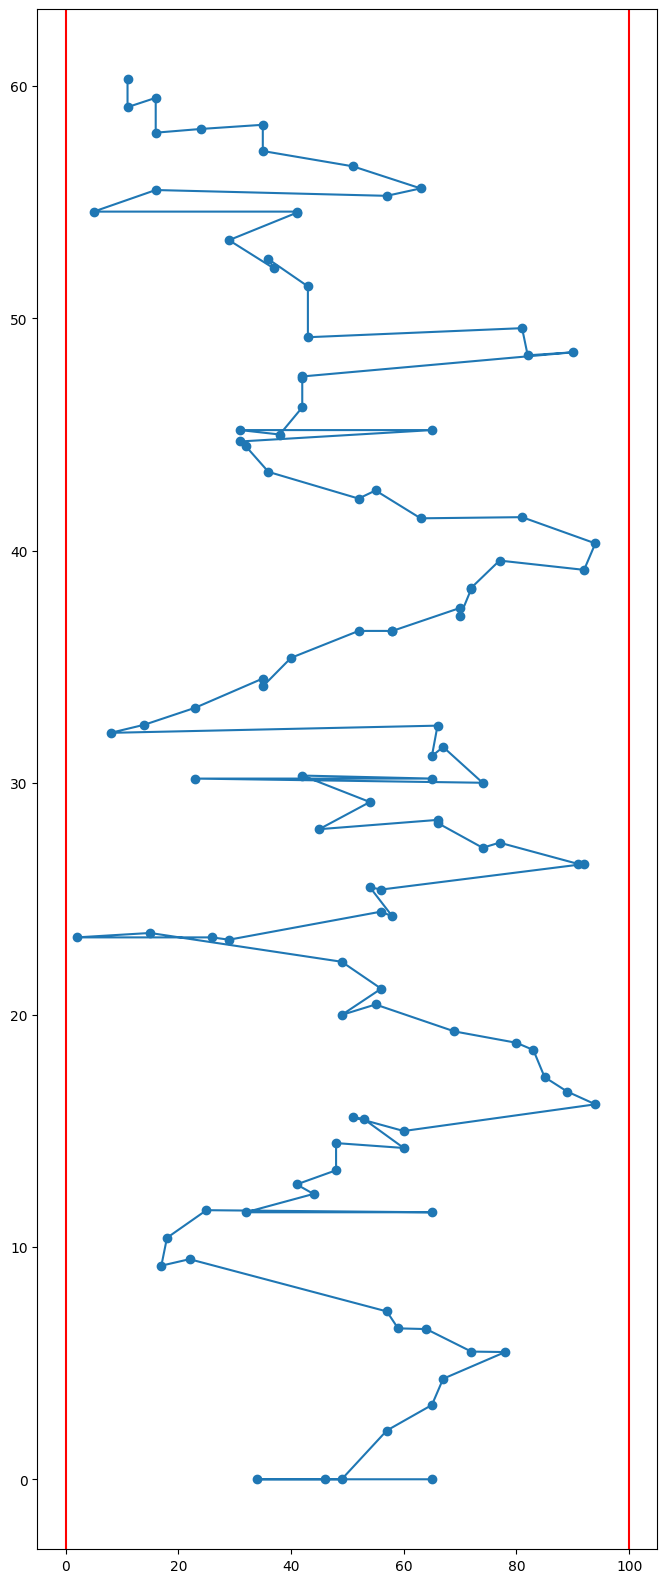

In [83]:
import matplotlib.pyplot as plt

X = list(map(lambda a: a['norm_time'], timeline))
y = list(map(lambda a: a['ydline'], timeline))

plt.figure(figsize=(8, 20))
plt.plot(y, X, '-o')
plt.axvline(0, color='r')
plt.axvline(100, color='r')